In [ ]:
!pip install matplotlib nixtla

In [18]:
from nixtla import NixtlaClient

In [19]:
nixtla_client = NixtlaClient(
    api_key = 'YOUR-FREE-TRIAL-API-KEY'
)

In [20]:
nixtla_client.validate_api_key()

True

In [21]:
import pandas as pd

In [40]:
df = pd.read_csv('./obd_data.csv')
df['ABSOLUTE_LOAD'] = df['ABSOLUTE_LOAD'].str.replace(' percent', '', regex=False)
df['ABSOLUTE_LOAD'] = pd.to_numeric(df['ABSOLUTE_LOAD'], errors='coerce')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Unix_Timestamp'] = df['Timestamp'].astype('int64') // 10**9
df.head(1000)

,ABSOLUTE_LOAD,BAROMETRIC_PRESSURE,CALIBRATION_ID,CATALYST_TEMP_B1S1,CATALYST_TEMP_B1S2,COMMANDED_EGR,COMMANDED_EQUIV_RATIO,CONTROL_MODULE_VOLTAGE,COOLANT_TEMP,CVN,...,STATUS,THROTTLE_ACTUATOR,THROTTLE_POS,THROTTLE_POS_B,TIME_SINCE_DTC_CLEARED,TIMING_ADVANCE,Timestamp,VIN,WARMUPS_SINCE_DTC_CLEAR,Unix_Timestamp
0,32.941176,97 kilopascal,bytearray(b'312J6'),513.0 degree_Celsius,29.700000000000003 degree_Celsius,0.0 percent,0.9872545 ratio,14.667 volt,55 degree_Celsius,6953cd4b611f6e,...,<obd.OBDResponse.Status object at 0x7395316e4440>,44.31372549019608 percent,16.862745098039216 percent,57.254901960784316 percent,91.0 minute,-5.5 degree,2024-12-21 20:47:26,bytearray(b'WP0ZZZ99ZTS39'),4.0 count,1734814046
1,23.529412,97 kilopascal,bytearray(b'312J6'),714.8000000000001 degree_Celsius,197.20000000000002 degree_Celsius,0.0 percent,0.987773 ratio,14.785 volt,28 degree_Celsius,6953cd4b611f6e,...,<obd.OBDResponse.Status object at 0x7395316e6a80>,20.0 percent,43.92156862745098 percent,48.23529411764706 percent,92.0 minute,-5.0 degree,2024-12-21 20:47:27,bytearray(b'MAT403096BNL'),4.0 count,1734814047
2,22.352941,97 kilopascal,bytearray(b'312J6'),679.6 degree_Celsius,131.9 degree_Celsius,0.0 percent,0.992592 ratio,14.707 volt,36 degree_Celsius,6953cd4b611f6e,...,<obd.OBDResponse.Status object at 0x7395316ed1f0>,43.529411764705884 percent,26.666666666666668 percent,49.01960784313726 percent,93.0 minute,7.0 degree,2024-12-21 20:47:28,bytearray(b'SB1ZS3JE60E28'),4.0 count,1734814048
3,16.078431,97 kilopascal,bytearray(b'312J6'),74.2 degree_Celsius,330.3 degree_Celsius,0.0 percent,1.0054325 ratio,14.687000000000001 volt,60 degree_Celsius,6953cd4b611f6e,...,<obd.OBDResponse.Status object at 0x7395316ef980>,23.92156862745098 percent,31.372549019607842 percent,50.588235294117645 percent,91.0 minute,17.0 degree,2024-12-21 20:47:30,bytearray(b'WP0ZZZ99ZTS39'),4.0 count,1734814050
4,73.333333,97 kilopascal,bytearray(b'312J6'),325.1 degree_Celsius,47.30000000000001 degree_Celsius,0.0 percent,0.998997 ratio,14.746 volt,45 degree_Celsius,6953cd4b611f6e,...,<obd.OBDResponse.Status object at 0x7395316f20f0>,45.490196078431374 percent,19.607843137254903 percent,67.84313725490196 percent,92.0 minute,7.5 degree,2024-12-21 20:47:31,bytearray(b'MAT403096BNL'),4.0 count,1734814051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,32.941176,97 kilopascal,bytearray(b'312J6'),852.8000000000001 degree_Celsius,24.299999999999997 degree_Celsius,0.0 percent,0.9872545 ratio,14.667 volt,51 degree_Celsius,6953cd4b611f6e,...,<obd.OBDResponse.Status object at 0x73953101aa20>,44.31372549019608 percent,26.666666666666668 percent,49.01960784313726 percent,91.0 minute,-5.5 degree,2024-12-21 20:52:21,bytearray(b'WP0ZZZ99ZTS39'),4.0 count,1734814341
253,23.529412,97 kilopascal,bytearray(b'312J6'),787.0 degree_Celsius,545.3000000000001 degree_Celsius,0.0 percent,0.987773 ratio,14.785 volt,32 degree_Celsius,6953cd4b611f6e,...,<obd.OBDResponse.Status object at 0x7395310211f0>,20.0 percent,31.372549019607842 percent,50.588235294117645 percent,92.0 minute,-5.0 degree,2024-12-21 20:52:22,bytearray(b'MAT403096BNL'),4.0 count,1734814342
254,22.352941,97 kilopascal,bytearray(b'312J6'),687.0 degree_Celsius,655.1 degree_Celsius,0.0 percent,0.992592 ratio,14.707 volt,29 degree_Celsius,6953cd4b611f6e,...,<obd.OBDResponse.Status object at 0x739531023920>,43.529411764705884 percent,19.607843137254903 percent,67.84313725490196 percent,93.0 minute,7.0 degree,2024-12-21 20:52:24,bytearray(b'SB1ZS3JE60E28'),4.0 count,1734814344
255,16.078431,97 kilopascal,bytearray(b'312J6'),513.0 degree_Celsius,29.700000000000003 degree_Celsius,0.0 percent,1.0054325 ratio,14.687000000000001 volt,46 degree_Celsius,6953cd4b611f6e,...,<obd.OBDResponse.Status object at 0x73953102a0f0>,23.92156862745098 percent,44.705882352941174 percent,91.37254901960785 percent,91.0 minute,17.0 degree,2024-12-21 20:52:25,bytearray(b'WP0ZZZ99ZTS39'),4.0 count,1734814345


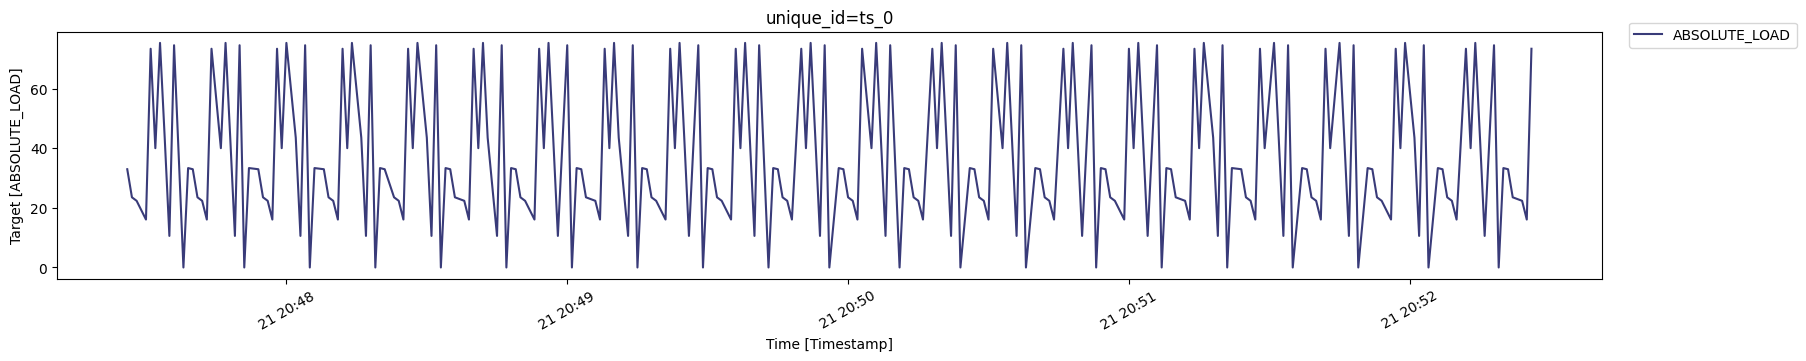

In [43]:
nixtla_client.plot(df, time_col='Timestamp', target_col='ABSOLUTE_LOAD')

In [ ]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=12, freq='s', time_col='Timestamp', target_col='ABSOLUTE_LOAD')
timegpt_fcst_df.head()

In [ ]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='Timestamp', target_col='ABSOLUTE_LOAD')

In [ ]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=36, time_col='Timestamp', target_col='ABSOLUTE_LOAD', freq='s', model='timegpt-1-long-horizon')
timegpt_fcst_df.head()

In [ ]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='Timestamp', target_col='ABSOLUTE_LOAD')